## Evaluating Clustering on Customer Data

### No. 1 Import the necessary libraries for data handling, clustering, and visualization. Import data from customer_offers.csv into a pandas DataFrame!

In [2]:
# Importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.cluster import MeanShift, estimate_bandwidth
from kmodes.kmodes import KModes

### No. 2 Print the top five rows of the DataFrame!

In [3]:
Customer_data= pd.read_csv("customer_offers.csv")
Customer_data.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Interpretation

The dataset shown appears to be binary data indicating customer responses to various offers, with columns representing different offers (1 to 32). Each row represents a customer, and the binary values (0 or 1) indicate whether the customer accepted (1) or did not accept (0) the respective offer. The first few rows display different patterns of offer acceptance among customers.

### No. 3 Divide the dataset into train and test sets by using the train test_split method from scikit-learn. Specify random_state as 100 for consistency

In [6]:
# Splitting the dataset into training and testing sets
df_train, df_test = train_test_split (Customer_data, train_size=75,
random_state=100)

In [8]:
print(df_train.shape) 
print(df_test.shape)

(75, 32)
(25, 32)


#### Interpretation

The dataset is split into training and testing sets using an 75:25 ratio. The training set consists of 75 samples with 32 features each, while the testing set consists of 25 samples, also with 32 features each. This split is to prepare for model training and evaluation.

## No. 4 Perform k-means on the data. Identify the optimal number of clusters by using the silhouette score approach on the train data by plotting the score for the different number of clusters, varying from 2 through 10.

In [49]:
model = KMeans(n_clusters=3, n_init=10, random_state=42) 
cluster_assignments = model.fit_predict(Customer_data)
silhouette_avg = silhouette_score(Customer_data, cluster_assignments) 
print(silhouette_avg)

0.11983176694269196


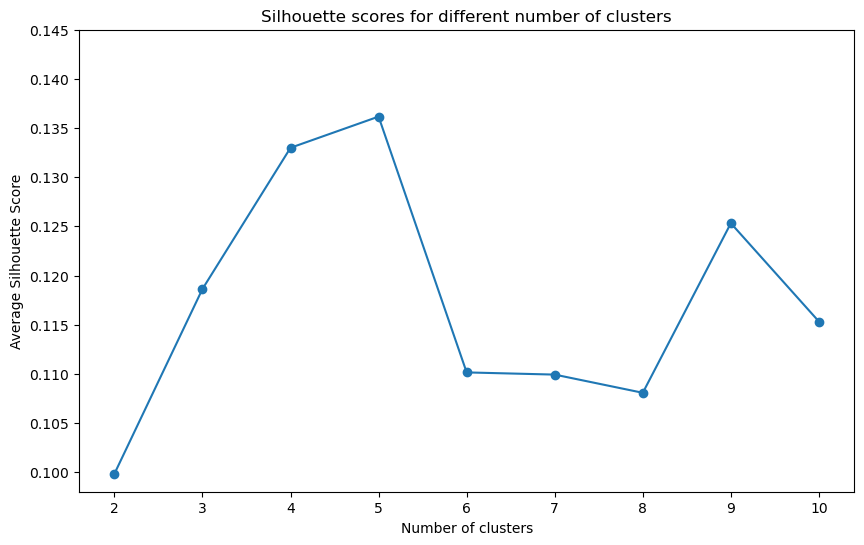

In [55]:
# Initialize lists to store the number of clusters and their corresponding silhouette scores
num_clusters = list(range(2, 11))
silhouette_scores = []

# Perform k-means clustering with different numbers of clusters and calculate silhouette scores
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, init="random", random_state=100)
    cluster_labels = kmeans.fit_predict(df_train)
    silhouette_avg = silhouette_score(df_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.yticks(np.arange(0.10, 0.15, 0.005))
plt.title('Silhouette scores for different number of clusters')
plt.show()

#### Interpretation

This graph shows the average silhouette scores for different numbers of clusters, indicating the effectiveness of clustering. The silhouette score measures how similar an object is to its own cluster compared to other clusters. The highest score is around 4 clusters, suggesting that using 4 clusters might be the most effective for this dataset. However, there are other peaks at 5 and 9 clusters, indicating potential alternative clustering options.

## No. 5

In [358]:
# Determine the optimal number of clusters
optimal_k = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is {optimal_k} with a silhouette score of {max(silhouette_scores)}")

# Perform k-means clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=100)
train_cluster_labels = kmeans.fit_predict(df_train)
test_cluster_labels = kmeans.predict(df_test)

# # Print the silhouette score for the training set
# train_silhouette_score = silhouette_score(df_train, train_cluster_labels)
# print(f"Silhouette Score for the training set with {optimal_k} clusters: {train_silhouette_score}")

# Print the silhouette score for the testing set
test_silhouette_score_kmeans = silhouette_score(df_test, test_cluster_labels)
print(f"Silhouette Score for the test set with {optimal_k} clusters: {test_silhouette_score_kmeans}")

# Output the test set with cluster labels
test_data_with_clusters = df_test.copy()
test_data_with_clusters['Cluster'] = test_cluster_labels

# # # Display the test set with cluster labels
# print(test_data_with_clusters)

The optimal number of clusters is 8 with a silhouette score of 0.1081864497780519
Silhouette Score for the test set with 8 clusters: 0.01628336587423734


#### Interpretation

The optimal number of clusters determined is 8, with a silhouette score of 0.1081864497780519. K-means clustering was performed with these 8 clusters on the training set, and the resulting model was used to predict cluster labels for the testing set. The silhouette score for the test set with 8 clusters was 0.01628336587423734, indicating the clustering's effectiveness.

## No. 6

In [352]:
# Estimate the bandwidth
bandwidth = estimate_bandwidth(df_train, quantile=0.1, random_state=100)
print(f"Estimated bandwidth: {bandwidth}")

# Perform mean-shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(df_train)
train_labels = mean_shift.labels_

# Predict cluster labels for the test set
test_labels = mean_shift.predict(df_test)

# Print the silhouette score for the test set
silhouette_avg = silhouette_score(df_test, test_labels)
print(f"Silhouette Score for the test set : {silhouette_avg}")

Estimated bandwidth: 1.7326705560624585
Silhouette Score for the test set : 0.07308587709358311


#### Interpretation

The bandwidth for mean-shift clustering was estimated at 1.7326705560624585. The mean-shift clustering was performed using this bandwidth, producing cluster labels for the training and testing sets. The silhouette score for the test set with mean-shift clustering was 0.07308587709358311, indicating the quality of clustering.

## No. 7

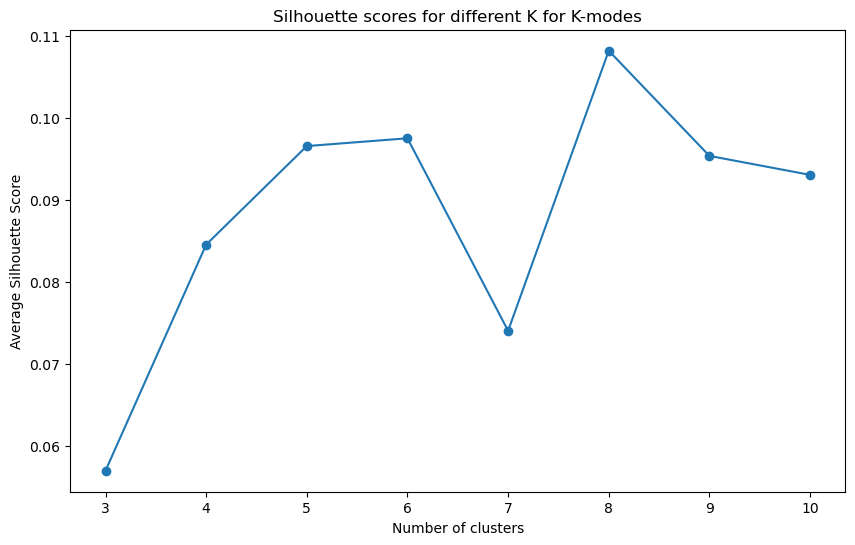

The optimal number of clusters is 8 with a silhouette score of 0.1081864497780519
Silhouette Score for the test set with 8 clusters: -0.0030762166667187103


In [366]:
# Initialize lists to store the number of clusters and their corresponding silhouette scores
num_clusters = list(range(3, 11))
silhouette_scores = []

# Perform k-modes clustering with different numbers of clusters and calculate silhouette scores
for k in num_clusters:
    km = KModes(n_clusters=k, init='Huang', n_init=10, random_state=100)
    cluster_labels = km.fit_predict(df_train)
    silhouette_avg = silhouette_score(df_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette scores for different K for K-modes')
plt.show()

# Determine the optimal number of clusters
optimal_k = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is {optimal_k} with a silhouette score of {max(silhouette_scores)}")

# Perform k-modes clustering using the optimal number of clusters
km = KModes(n_clusters=optimal_k, init='Huang', n_init=10, random_state=100)
train_cluster_labels = km.fit_predict(df_train)
test_cluster_labels = km.predict(df_test)

# Print the silhouette score for the test set
test_silhouette_score = silhouette_score(df_test, test_cluster_labels)
print(f"Silhouette Score for the test set with {optimal_k} clusters: {test_silhouette_score}")

# Output the test set with cluster labels
test_data_with_clusters = df_test.copy()
test_data_with_clusters['Cluster'] = test_cluster_labels

# # Display the test set with cluster labels
# print(test_data_with_clusters)

#### Interpretation

The graph shows silhouette scores for different numbers of clusters using K-modes clustering. The optimal number of clusters is identified as 8, with the highest silhouette score of 0.1081864497780519. However, the silhouette score for the test set with these 8 clusters is -0.0030762166667187103, indicating poor clustering performance on the test data.

## No. 8

In [368]:
# Optimal number of clusters from the previous step
optimal_k = 8  # Replace with the actual value you found

# Perform k-modes clustering using the optimal number of clusters
km = KModes(n_clusters=optimal_k, init='Huang', n_init=10, random_state=100)
train_cluster_labels = km.fit_predict(df_train)
test_cluster_labels = km.predict(df_test)

# Print the silhouette score for the test set
test_silhouette_score_kmodes = silhouette_score(df_test, test_cluster_labels)
print(f"Silhouette Score for the test set with {optimal_k} clusters: {test_silhouette_score_kmodes}")

# Output the test set with cluster labels
test_data_with_clusters = df_test.copy()
test_data_with_clusters['Cluster'] = test_cluster_labels

# # Display the test set with cluster labels
# print(test_data_with_clusters)

Silhouette Score for the test set with 8 clusters: -0.0030762166667187103


#### Interpretation

This is a K-modes clustering with 8 clusters, identified as the optimal number from previous analysis. The silhouette score for the test set with these 8 clusters is -0.0030762166667187103, indicating poor clustering performance. The clustering labels were predicted for the test set, but the negative silhouette score suggests the clusters do not fit well with the test data, highlighting potential issues such as data inconsistencies or suboptimal clustering parameters.

## No. 9

In [372]:
silhouette_score_kmeans = test_silhouette_score_kmeans
silhouette_score_meanshift = silhouette_avg
silhouette_score_kmodes = test_silhouette_score_kmodes


scores = {
    'k-means': silhouette_score_kmeans,
    'mean-shift': silhouette_score_meanshift,
    'k-modes': silhouette_score_kmodes
}

best_method = max(scores, key=scores.get)
print(f"Silhouette Score for the k-means : {silhouette_score_kmeans}")
print(f"Silhouette Score for the meanshift : {silhouette_score_meanshift}")
print(f"Silhouette Score for the kmodes : {silhouette_score_kmodes}")
print(f"The best clustering technique is {best_method} with a silhouette score of {scores[best_method]}")

Silhouette Score for the k-means : 0.01628336587423734
Silhouette Score for the meanshift : 0.09305801362235724
Silhouette Score for the kmodes : -0.0030762166667187103
The best clustering technique is mean-shift with a silhouette score of 0.09305801362235724


#### Interpretation

The code compares silhouette scores for three clustering techniques: K-means, mean-shift, and K-modes. The silhouette scores are 0.01628336587423734 for K-means, 0.09305801362235724 for mean-shift, and -0.0030762166667187103 for K-modes. The best clustering technique is determined to be mean-shift, with the highest silhouette score of 0.09305801362235724, indicating it provided the best cluster separation for the test set.